In [71]:
import pandas as pd

df_benign_1 = pd.read_csv('../data/Benign_test.pcap.csv')
df_benign_2 = pd.read_csv('../data/Benign_train.pcap.csv')

df_dos_1 = pd.read_csv('../data/MQTT-DoS-Connect_Flood_test.pcap.csv')
df_dos_2 = pd.read_csv('../data/MQTT-DoS-Connect_Flood_train.pcap.csv')

df_dos_3 = pd.read_csv('../data/MQTT-DoS-Publish_Flood_test.pcap.csv')
df_dos_4 = pd.read_csv('../data/MQTT-DoS-Publish_Flood_train.pcap.csv')

df_dos_5 = pd.read_csv('../data/TCP_IP-DoS-ICMP_test.pcap.csv')
df_dos_6 = pd.read_csv('../data/TCP_IP-DoS-ICMP1_train.pcap.csv')
df_dos_7 = pd.read_csv('../data/TCP_IP-DoS-ICMP2_train.pcap.csv')
df_dos_8 = pd.read_csv('../data/TCP_IP-DoS-ICMP3_train.pcap.csv')
df_dos_9 = pd.read_csv('../data/TCP_IP-DoS-ICMP4_train.pcap.csv')

df_dos_10 = pd.read_csv('../data/TCP_IP-DoS-SYN_test.pcap.csv')
df_dos_11 = pd.read_csv('../data/TCP_IP-DoS-SYN1_train.pcap.csv')
df_dos_12 = pd.read_csv('../data/TCP_IP-DoS-SYN2_train.pcap.csv')
df_dos_13 = pd.read_csv('../data/TCP_IP-DoS-SYN3_train.pcap.csv')
df_dos_14 = pd.read_csv('../data/TCP_IP-DoS-SYN4_train.pcap.csv')


df_dos_15 = pd.read_csv('../data/TCP_IP-DoS-TCP_test.pcap.csv')
df_dos_16 = pd.read_csv('../data/TCP_IP-DoS-TCP1_train.pcap.csv')
df_dos_17 = pd.read_csv('../data/TCP_IP-DoS-TCP2_train.pcap.csv')
df_dos_18 = pd.read_csv('../data/TCP_IP-DoS-TCP3_train.pcap.csv')
df_dos_19 = pd.read_csv('../data/TCP_IP-DoS-TCP4_train.pcap.csv')


df_dos_20 = pd.read_csv('../data/TCP_IP-DoS-UDP_test.pcap.csv')
df_dos_21 = pd.read_csv('../data/TCP_IP-DoS-UDP1_train.pcap.csv')
df_dos_22 = pd.read_csv('../data/TCP_IP-DoS-UDP2_train.pcap.csv')
df_dos_23 = pd.read_csv('../data/TCP_IP-DoS-UDP3_train.pcap.csv')
df_dos_24 = pd.read_csv('../data/TCP_IP-DoS-UDP4_train.pcap.csv')


In [72]:
frames = [df_dos_1,df_dos_2, df_dos_3,df_dos_4, df_dos_5,df_dos_6, df_dos_7,df_dos_8, df_dos_9,df_dos_10, df_dos_11,df_dos_12, df_dos_13,df_dos_14, df_dos_15,df_dos_16, df_dos_17,df_dos_18, df_dos_19,df_dos_20, df_dos_21,df_dos_22, df_dos_23,df_dos_24]

df_dos = pd.concat(frames)
df_dos['label'] = 1

In [73]:
frames = [df_benign_1, df_benign_2]
df_benign = pd.concat(frames)
df_benign['label'] = 0

In [74]:
# df = df.sample(frac=1)
df_dos.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,158.41,6.0,64.0,399065.015441,399065.015441,0.0,0.10,0.08,0.21,0.23,...,4.486808,66.94,1.015949e+08,9.5,11.413905,6.335676,28.276434,0.83,141.55,1
1,179.30,6.0,64.0,31750.166781,31750.166781,0.0,0.04,0.13,0.17,0.31,...,5.553239,69.99,8.466238e+07,9.5,11.885642,7.843066,37.053936,0.93,141.55,1
2,139.17,6.0,64.0,22614.008205,22614.008205,0.0,0.06,0.20,0.09,0.33,...,5.478629,71.63,8.466238e+07,9.5,12.040412,7.741587,35.494420,0.92,141.55,1
3,212.93,6.0,64.0,243.837273,243.837273,0.0,0.05,0.22,0.16,0.20,...,4.229824,67.88,8.466238e+07,9.5,11.648866,5.977710,24.445952,0.88,141.55,1
4,162.43,6.0,64.0,33098.483845,33098.483845,0.0,0.04,0.25,0.24,0.20,...,5.638827,69.85,8.466238e+07,9.5,11.771737,7.979350,36.579275,0.90,141.55,1


In [75]:
df_benign.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,138.2,7.1,83.1,39123.054540,39123.054540,0.0,0.0,0.0,0.0,0.5,...,58.513912,99.0,1.694703e+08,5.5,15.954786,82.751168,3899.571692,0.9,38.5,0
1,86.0,4.2,44.8,72928.095973,72928.095973,0.0,0.0,0.0,0.0,0.3,...,44.556792,64.4,1.694703e+08,13.5,13.405243,63.022662,1993.712535,1.0,244.6,0
2,171.4,4.1,32.0,52552.111857,52552.111857,0.0,0.0,0.0,0.0,0.2,...,148.485766,152.1,9.108920e-02,5.5,14.407632,209.990584,42487.982728,0.9,38.5,0
3,227.8,6.0,64.0,24502.562704,24502.562704,0.0,0.0,0.0,0.0,0.5,...,214.732903,80.2,1.694703e+08,13.5,15.986909,304.317403,46658.604609,1.0,244.6,0
4,347.6,7.1,64.0,6263.156480,6263.156480,0.0,0.0,0.0,0.0,0.5,...,116.233361,162.5,9.976871e-02,5.5,15.169114,164.378795,30786.754577,0.9,38.5,0


In [76]:
df_dos.tail()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
143296,13234.910000,17.0,64.0,29460.045053,29460.045053,0.0,0.0,0.0,0.0,0.0,...,5.968139,51.740000,8.467524e+07,9.500000,10.164175,8.453393,279.410488,0.130000,141.550000,1
143297,18136.530000,17.0,64.0,29318.535060,29318.535060,0.0,0.0,0.0,0.0,0.0,...,2.126578,50.620000,8.467524e+07,9.500000,10.060924,3.012129,35.475423,0.130000,141.550000,1
143298,23038.040000,17.0,64.0,29363.556139,29363.556139,0.0,0.0,0.0,0.0,0.0,...,2.321811,50.510000,8.467524e+07,9.500000,10.075262,3.287396,34.963050,0.160000,141.550000,1
143299,58526.160000,17.0,64.0,26168.955034,26168.955034,0.0,0.0,0.0,0.0,0.0,...,147.975762,170.680000,8.467524e+07,9.500000,18.631072,205.641671,70932.249555,0.350000,141.550000,1
143300,106790.104167,17.0,64.0,21326.211354,21326.211354,0.0,0.0,0.0,0.0,0.0,...,81.721073,363.020833,7.056270e+07,9.333333,19.620028,115.038946,38609.961724,0.177083,133.541667,1


In [77]:
df_benign.tail()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
192727,1850189.0,6.0,64.0,109.936181,109.936181,0.0,0.0,0.0,0.0,0.0,...,0.0,1494.0,0.000000e+00,5.5,54.662601,0.0,0.0,0.0,38.500000,0
192728,1865129.0,6.0,64.0,110.402958,110.402958,0.0,0.0,0.0,0.0,0.0,...,0.0,1494.0,1.694628e+08,13.5,54.662601,0.0,0.0,0.0,244.600000,0
192729,1880069.0,6.0,64.0,110.866519,110.866519,0.0,0.0,0.0,0.0,0.0,...,0.0,1494.0,0.000000e+00,5.5,54.662601,0.0,0.0,0.0,38.500000,0
192730,1895009.0,6.0,64.0,111.378485,111.378485,0.0,0.0,0.0,0.0,0.0,...,0.0,1494.0,1.694628e+08,13.5,54.662601,0.0,0.0,0.0,244.600000,0
192731,1906961.0,6.0,64.0,111.790441,111.790441,0.0,0.0,0.0,0.0,0.0,...,0.0,1494.0,2.348423e-04,3.5,54.662601,0.0,0.0,0.0,15.166667,0


In [78]:
frames = [df_benign, df_dos]
df = pd.concat(frames)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2521329 entries, 0 to 143300
Data columns (total 46 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Header_Length    float64
 1   Protocol Type    float64
 2   Duration         float64
 3   Rate             float64
 4   Srate            float64
 5   Drate            float64
 6   fin_flag_number  float64
 7   syn_flag_number  float64
 8   rst_flag_number  float64
 9   psh_flag_number  float64
 10  ack_flag_number  float64
 11  ece_flag_number  float64
 12  cwr_flag_number  float64
 13  ack_count        float64
 14  syn_count        float64
 15  fin_count        float64
 16  rst_count        float64
 17  HTTP             float64
 18  HTTPS            float64
 19  DNS              float64
 20  Telnet           float64
 21  SMTP             float64
 22  SSH              float64
 23  IRC              float64
 24  TCP              float64
 25  UDP              float64
 26  DHCP             float64
 27  ARP              f

In [80]:
df = df.sample(frac=1)

In [81]:
features  = ["Header_Length","Protocol Type","Duration","Rate","Srate","Drate","fin_flag_number","syn_flag_number","rst_flag_number","psh_flag_number","ack_flag_number","ece_flag_number","cwr_flag_number","ack_count","syn_count","fin_count","rst_count","HTTP","HTTPS","DNS","Telnet","SMTP","SSH","IRC","TCP","UDP","DHCP","ARP","ICMP","IGMP","IPv","LLC","Tot sum","Min","Max","AVG","Std","Tot size","IAT","Number","Magnitue","Radius","Covariance","Variance","Weight"]


X = df.loc[:,features ]
y = df.loc[:,['label']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [82]:
from sklearn import tree

model = tree.DecisionTreeRegressor()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9999709148214104

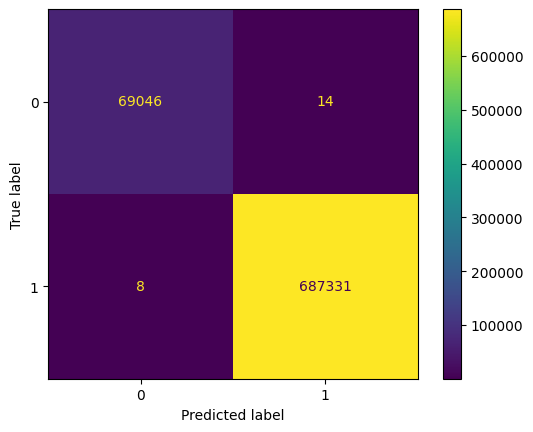

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()


In [85]:

from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))
print(f1_score(y_test, y_pred, average='weighted'))
print(f1_score(y_test, y_pred, average=None))

0.9999123538092645
0.9999709148214104
0.9999709142531188
[0.99984071 0.999984  ]
